In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Read data from a .csv file and print the first few rows
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<H1> Exploratory Data Analysis </h1>
Let's see how the amounts of chemicals in wine can explain its quality (quality is a target variable).

In [3]:
# Print a tuple representing the dimensionality of the DataFrame
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (6497, 13)


<h3> Basic Data Cleaning </h3>

In [5]:
# Print the number of missing values in the dataset in each row
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# Remove rows with NaN values
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3> Correlation matrix of dataset </h3>

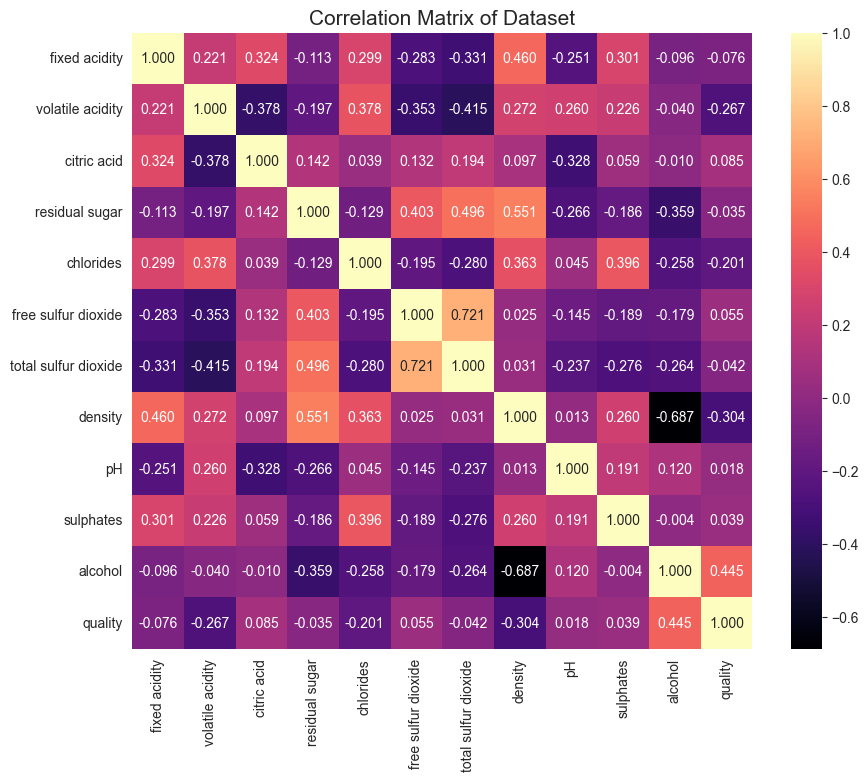

In [10]:
# Correlation matrix of dataset
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='magma', annot=True, fmt='0.3f',ax=ax)
ax.set_title('Correlation Matrix', fontsize=15);

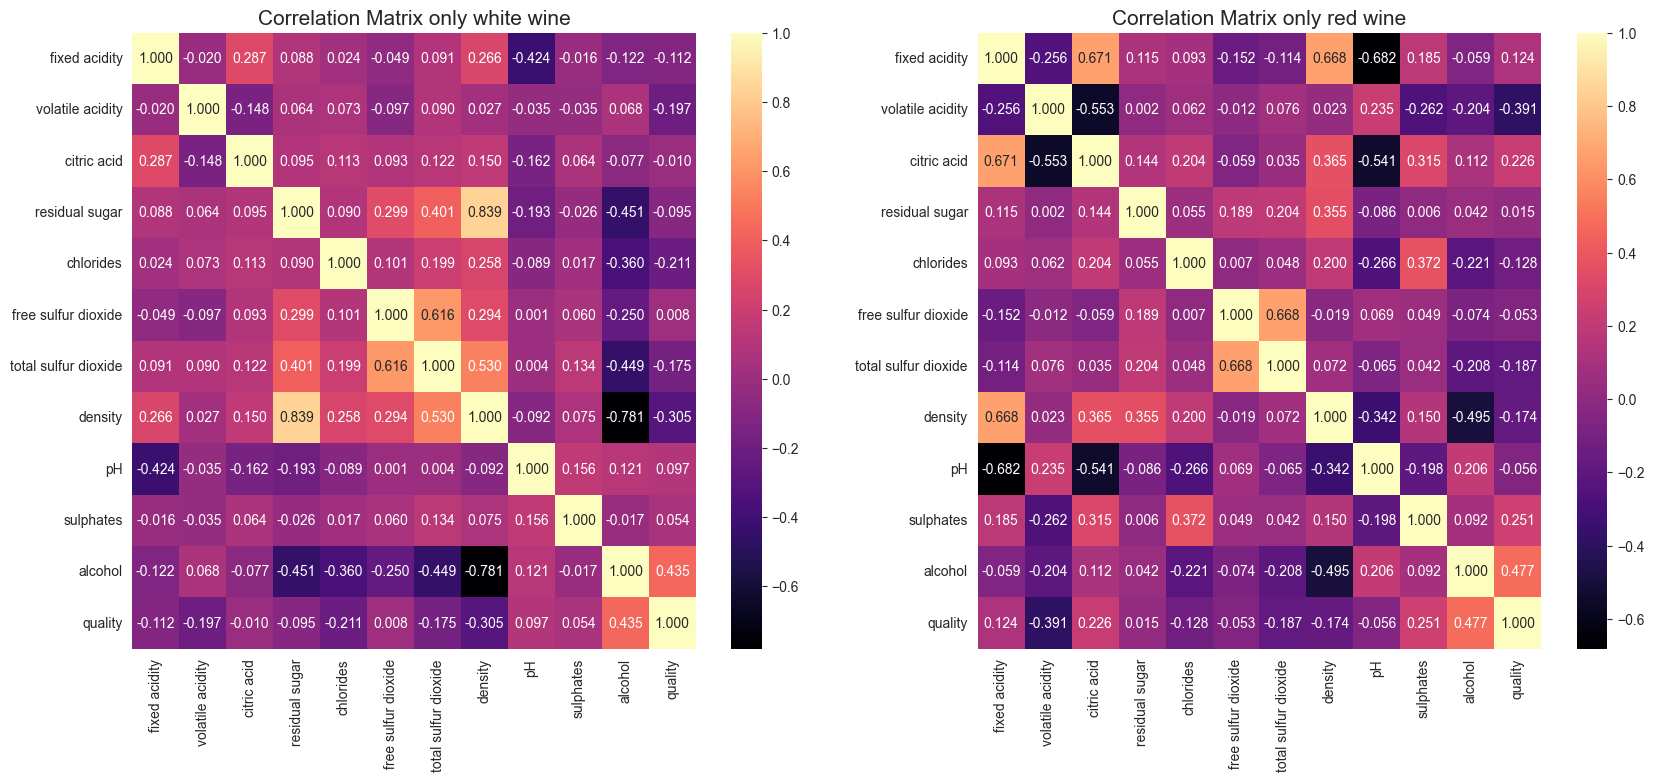

In [24]:
# Correlation matrix for white and red wine separately
fig, ax= plt.subplots(1,2, figsize=(20,8))
sns.heatmap(df[df['type']=='white'].corr(numeric_only=True), cmap='magma', annot=True, fmt='0.3f',ax=ax[0])
ax[0].set_title('Correlation Matrix only white wine', fontsize=15);
sns.heatmap(df[df['type']=='red'].corr(numeric_only=True), cmap='magma', annot=True, fmt='0.3f',ax=ax[1])
ax[1].set_title('Correlation Matrix only red wine', fontsize=15);

We can observe strong correlations of some pair of variables (based on the magnitude of correlation coefficient). Correlations are different for wine type.
For ex, (density, residual sugar) - high correlation for white wine, low for red.
Between X(s) and y variable: There is no clear relationship between quality and all explanatory variables.

In [4]:
# Generate descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


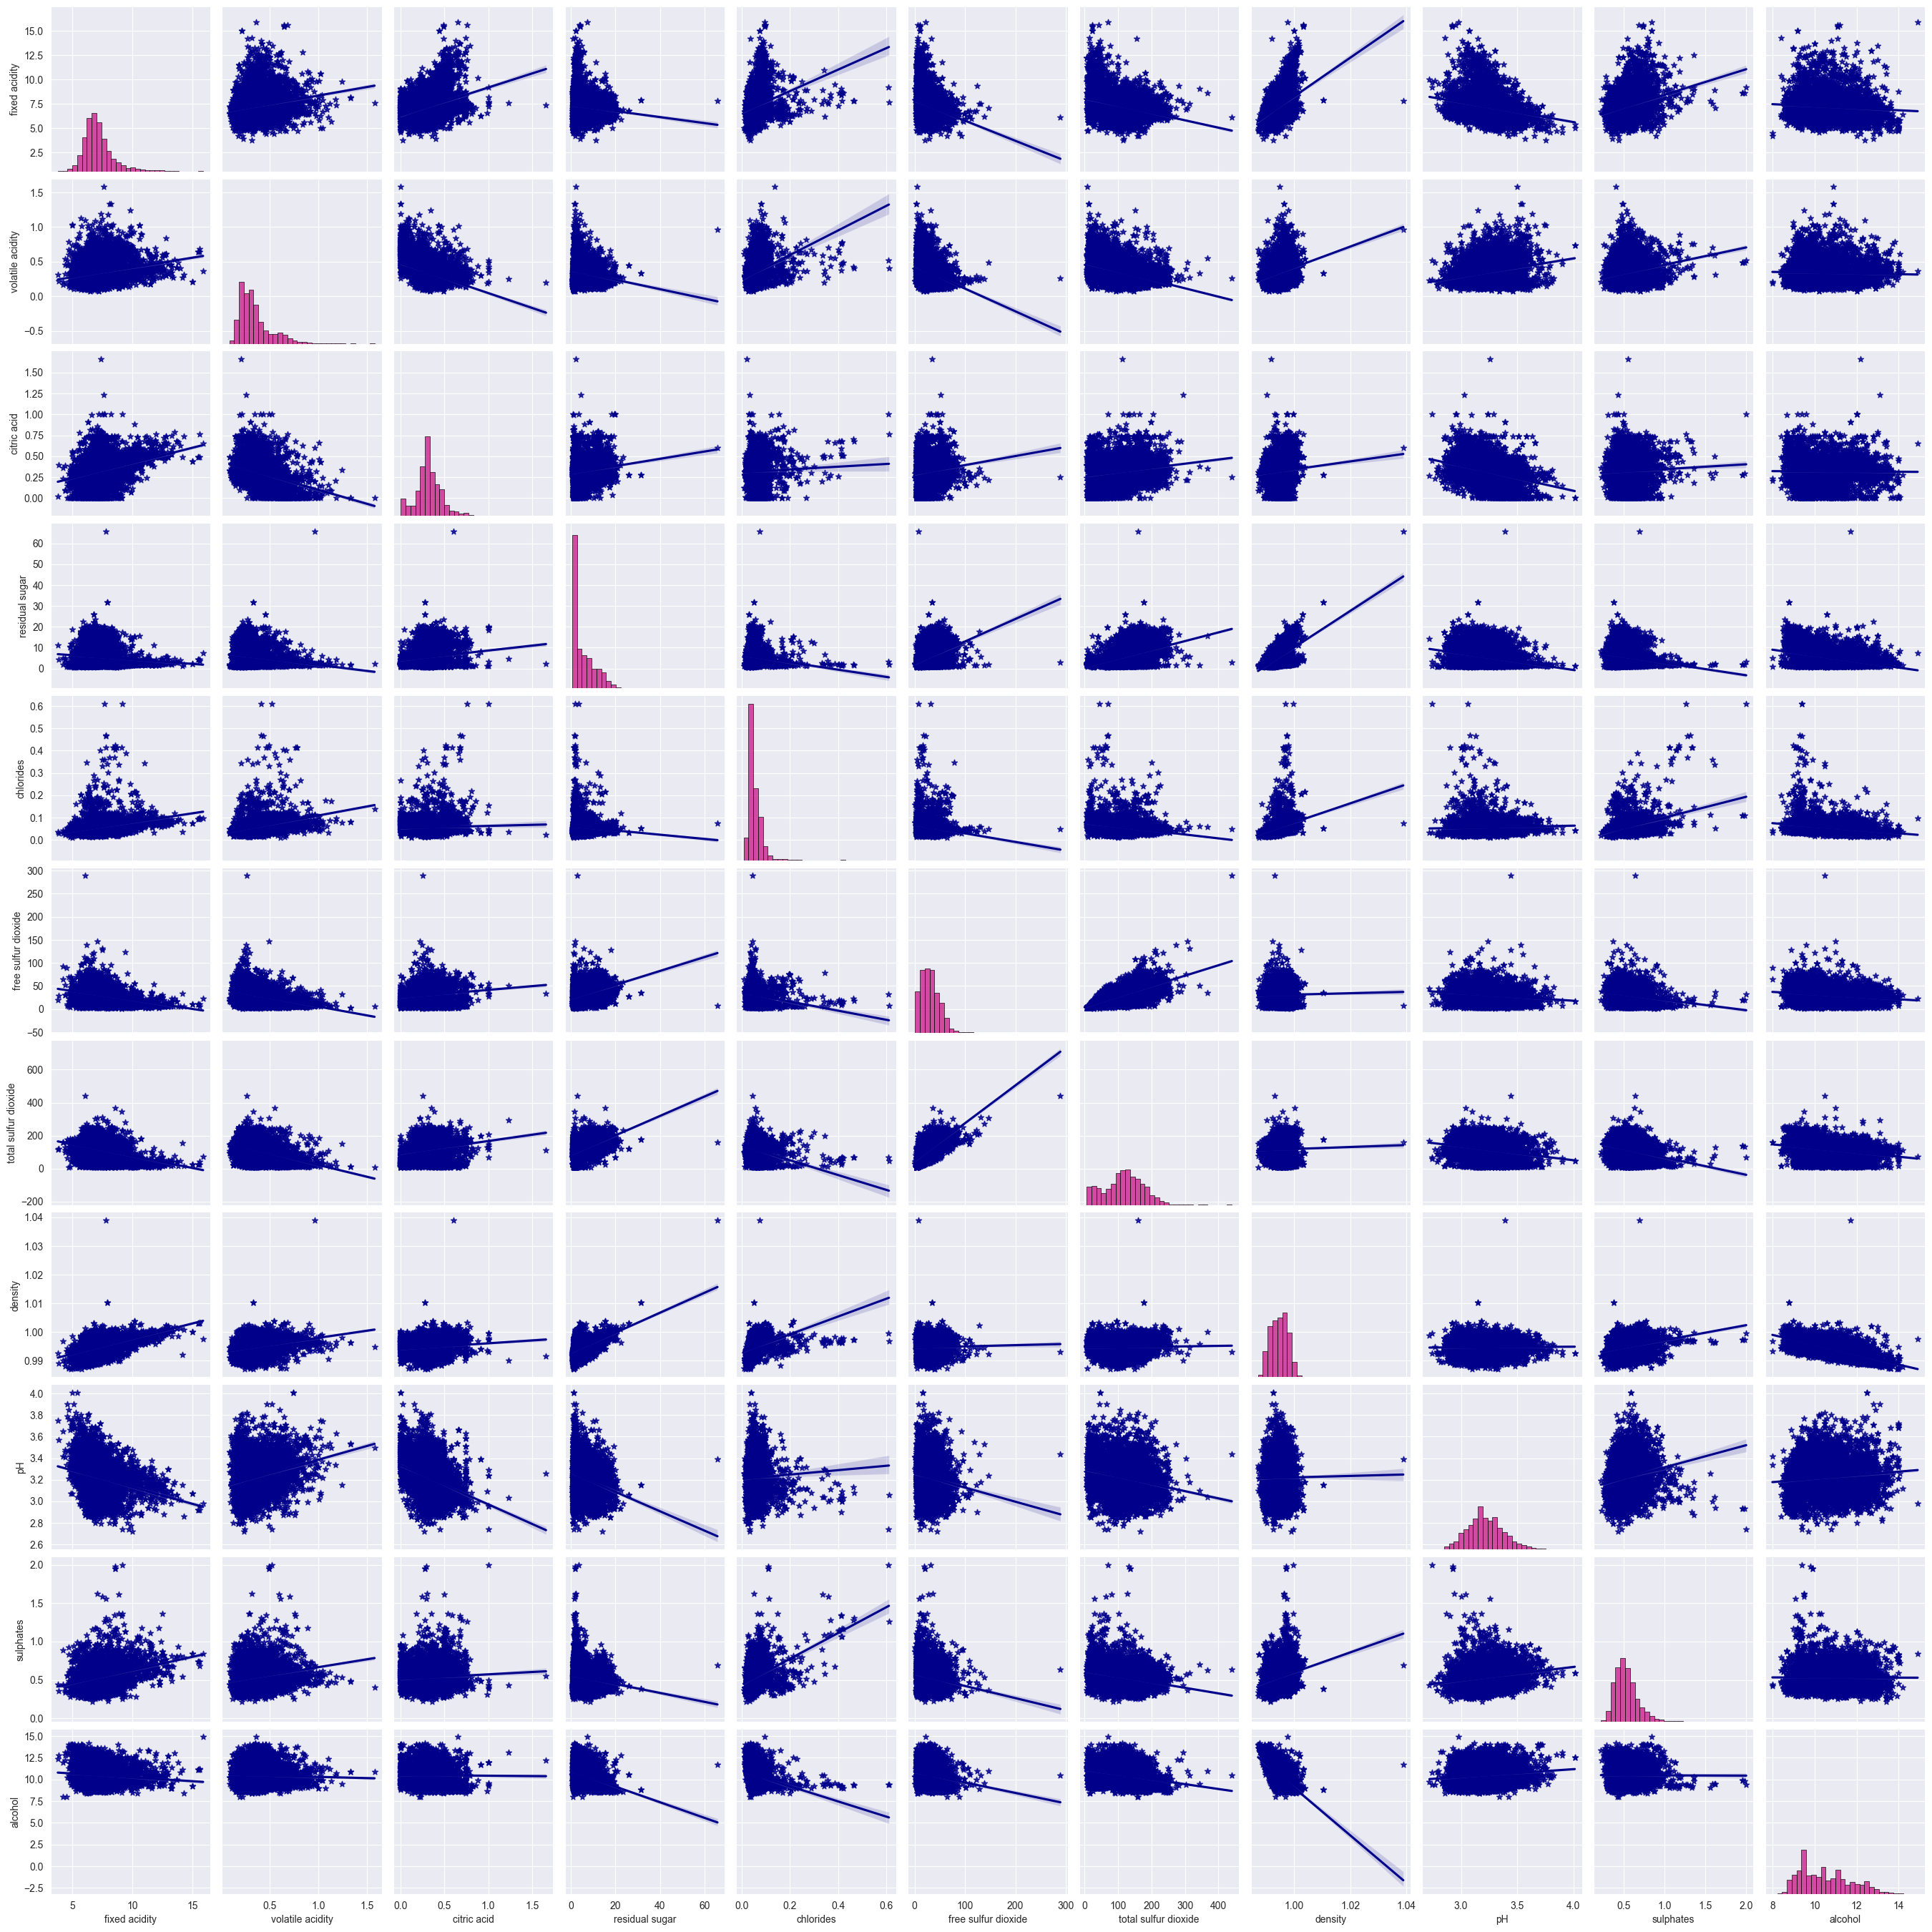

In [29]:
# Inspect the linear relationship btw X variables and their distribution
sns.pairplot(data=df[df.columns[:-1]], kind='reg', diag_kws={'bins':30, 'color':'mediumvioletred','edgecolor':'black'},
            plot_kws={'marker':'*', 'color':'darkblue'});

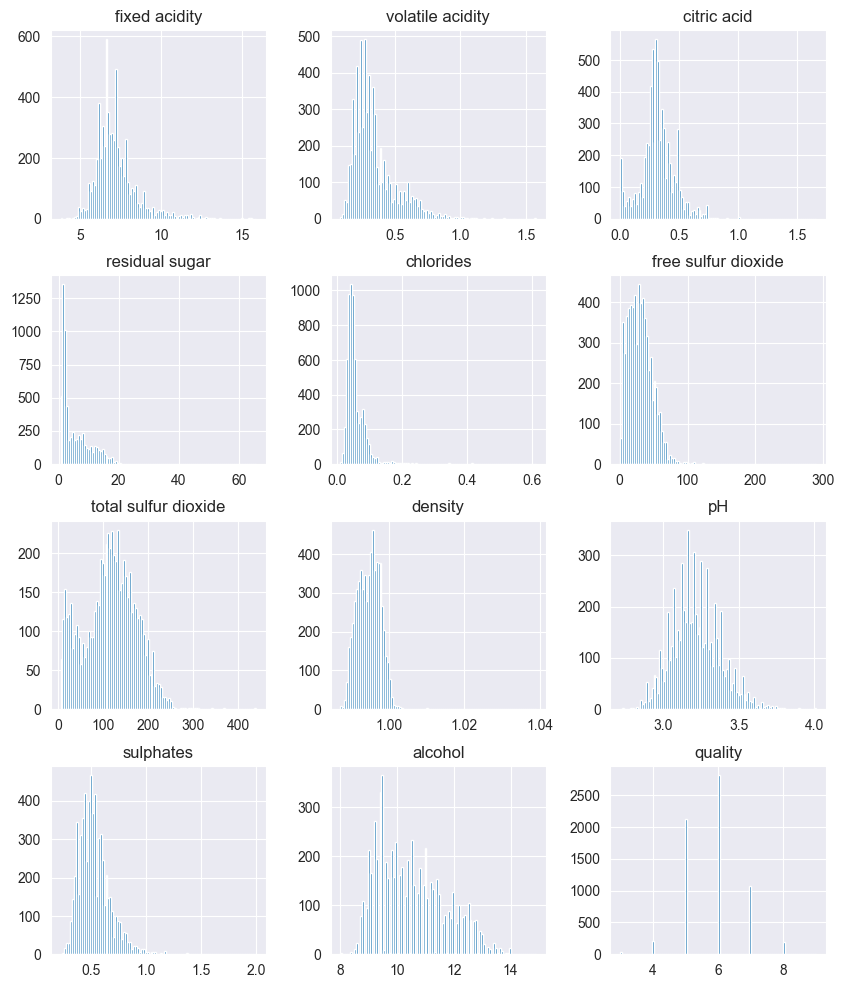

In [11]:
# Draw one histogram of the DataFrame’s columns.
df.hist(bins=100, figsize=(10,12))
plt.show()

Text(0.5, 0, 'Skewness')

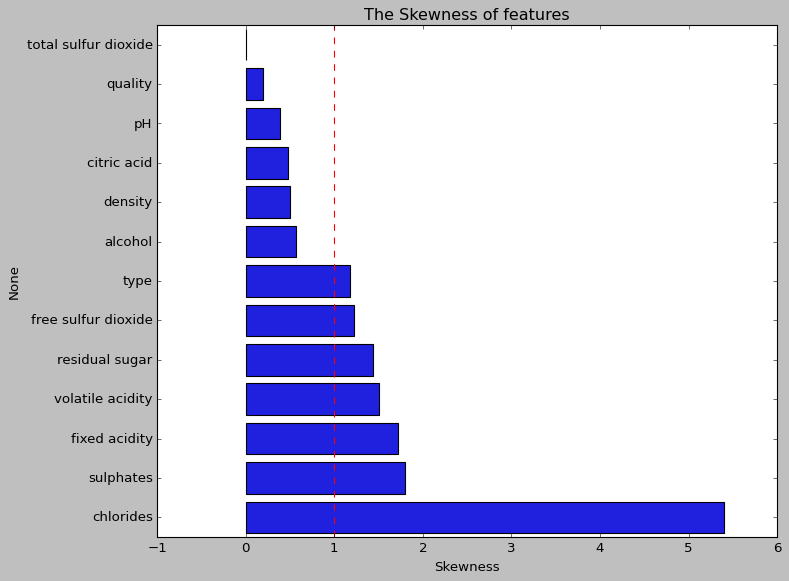

In [43]:
plt.figure(figsize=(10,8))
skewness=df.skew(numeric_only=True).sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

Except total sulfur dioxide, pH, citric acid, density and alcohol, all of other variables have right-skewed distribution.

In [7]:
# Prints the number of wines for each quality
df['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [31]:
df['quality'].value_counts(normalize=True)

quality
6    0.436330
5    0.329259
7    0.166177
4    0.033112
8    0.029708
3    0.004642
9    0.000774
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Wine quality')

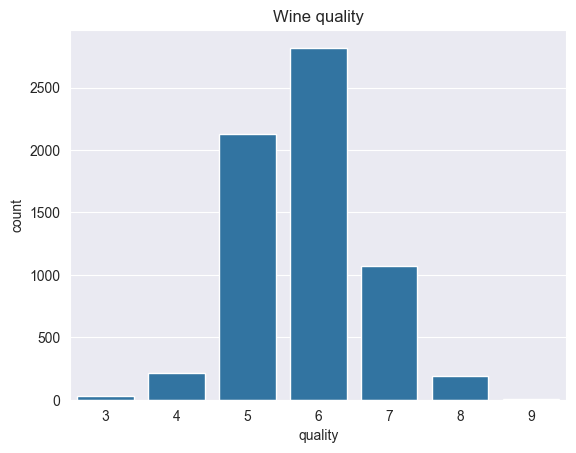

In [8]:
# Show the counts of observations in each categorical bin using bars
sns.countplot(data=df, x="quality").set_title("Wine quality")

Cardinality of target is 7 (number of unique categories)
Percentage of wine records having quality of 3,4,8 and 9 account for less than 7% of dataset => they are deemed as rare labels.
Most of wines samples have quality of 5, 6 or 7 (over 90 % of all records) => Imbalanced

Text(0, 0.5, 'correlation')

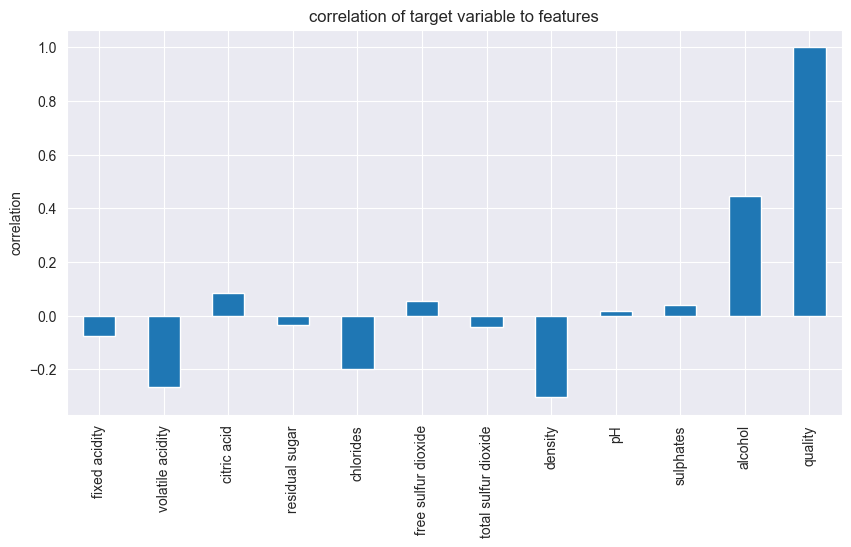

In [8]:
# Compute pairwise correlation of columns, for numeric only value
plt.figure(figsize=(10,5))
ax = df.corr(numeric_only=True)['quality'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

In [9]:
# Shows correlation in numbers
df.corr(numeric_only=True)['quality'].sort_values()

density                -0.304447
volatile acidity       -0.266677
chlorides              -0.200553
fixed acidity          -0.076174
total sulfur dioxide   -0.041598
residual sugar         -0.034654
pH                      0.018403
sulphates               0.039054
free sulfur dioxide     0.054924
citric acid             0.084926
alcohol                 0.444637
quality                 1.000000
Name: quality, dtype: float64

<h1> Data Processing

In [35]:
# Assign a number to the wine type: 0 for white, 1 for red
df.type = df.type.map({'white':0, 'red':1})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [36]:
# Split into 3 wine classes - Low - 0, Average = 1, and High = 2
bins = [0,4,7,10]
labels = [0,1,2]
df['quality_class']= pd.cut(x=df['quality'], bins=bins, labels=labels)

print(df[['quality_class','quality']].head(5))

# X - independent variables
# Y - dependent variable
X = df.drop(columns=['quality','quality_class'],axis=1)
y = df.quality_class

# Split arrays or matrices into random train and test subsets: 80% of data to the train set, 20% of data to the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

# Print a tuple representing the dimensionality of each subset
print(f"X_train {X_train.shape}")
print(f"y_train {y_train.shape}")
print(f"X_test {X_test.shape}" )
print(f"y_test {y_test.shape}")

  quality_class  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6
X_train (5170, 12)
y_train (5170,)
X_test (1293, 12)
y_test (1293,)


<H1> Training different models

<h2> Logistic Regression model

In [38]:
# Logistic Regression classifier.
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,40
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
# Predicted class
pred = lr.predict(X_test)

# Calculate the accuracy of the prediction
acc = accuracy_score(pred, y_test)
print("test accuracy is: {:.2f}%".format(acc*100))
print(classification_report(y_test, pred))

test accuracy is: 93.35%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.93      1.00      0.97      1207
           2       0.00      0.00      0.00        31

    accuracy                           0.93      1293
   macro avg       0.31      0.33      0.32      1293
weighted avg       0.87      0.93      0.90      1293



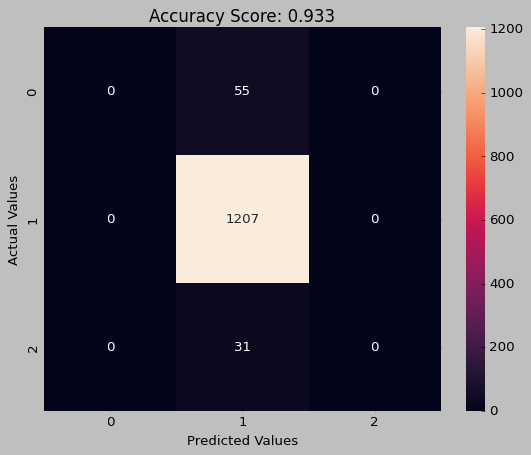

True Negative:  0
False Negative:  0
True Positive:  1207
False Positive:  55


In [41]:
# Confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
score = round(accuracy_score(y_test, pred), 3)
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

# Other metrics
print("True Negative: ", cm[0][0])
print("False Negative: ", cm[1][0])
print("True Positive: ", cm[1][1])
print("False Positive: ", cm[0][1])

In [ ]:
import pickle
# save the model to disk
with open('models\model.pkl','wb') as f:
    pickle.dump(lr,f)

<H1> What we can do? </h1>

<h2> Feature Engineering </h2>

To improve model performance, it's important to develop good features.

To create good feature engineering, it's crucial to conduct thorough data analysis and understand the problem (expert knowledge helps identify the correct relationships between features and the target variable).

<h2> <span style="color: green">TO DO: </h2>
<span style="color: green">

- Test and compare at least 2 other models. For each model, calculate accuracy, true negatives, false negatives, true positives, and false positives (display the results as a graph). Try different model parameters.
- Create new features – alcohol density (alcohol * density) and propose at least two new features based on existing ones. Test previously selected models for the new features, comparing how these features impacted the network results (Acc, TP, TN, FP, FN).
- Save those models, and test them in WineApp. Display each model on a separate graph (like the example one)
- Additionally, you can try PCA or LDA (https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)
</span>